In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
import networkx as nx
import pandas as pd

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$

## Warm-up

![QR code](https://api.qrserver.com/v1/create-qr-code/?data=https%3A%2F%2Fdocs.google.com%2Fforms%2Fd%2Fe%2F1FAIpQLSfHeJjpPAlSGrKwiKVHA3F7DHt8m2hyU1J8pCXqZADlQ2xpUA%2Fviewform%3Fusp%3Dsf_link&size=220x220&margin=0)

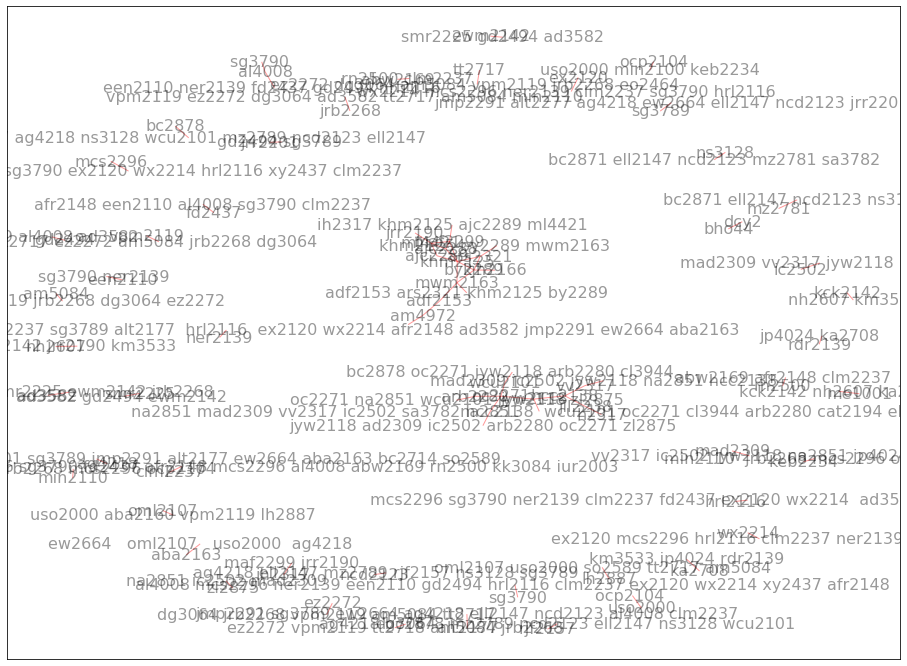

In [20]:
g = nx.Graph()
graphurl = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRRRe2UTmylp8TA9yH4epHwBrk5_HJbL8qOUYyNYgSQzBcX4gm_xTKmpt3P8yY9ySM9jlGZnZ9uXben/pub?gid=1928111589&single=true&output=csv"
df = pd.read_csv(graphurl)
friends = df["Friends"].str.lower().str.split(",\s*")

def proc_nodes(row):
    uni = row["UNI"].strip().lower()
    pals = friends[row.name]
#     print(friends[row.name],row["NetID"])
    try:
        for p in pals:
            g.add_edge(uni,p)
    except TypeError:
        g.add_edge(uni,"dcy2")
    
df.apply(proc_nodes,axis=1)
pos = nx.spring_layout(g)
fig,ax = plt.subplots(1,figsize=(16,12))
nx.draw_networkx(g,pos,node_size=0, alpha=0.4, edge_color='r', font_size=16, with_labels=True,ax=ax)

Welcome to APMA E2000

# Multivariable Calculus
 
Drew C Youngren

<code>dcy2@columbia.edu</code>


Welcome to APMA E2000

# Multivariable Calculus for Engineers and Applied Scientists

Drew C Youngren

<code>dcy2@columbia.edu</code>

Welcome to APMA E2000

<img src="img/tmp.gif" width="50%" style="float:right" />

# MVC

Drew C Youngren

<code>dcy2@columbia.edu</code>

## Logistics

  - [Schedule](https://docs.google.com/spreadsheets/d/1drlghOYpwFc4NQCwhOjH5YZyS1encqC27P3UNQXsm3Y/edit?usp=sharing)
  - Detailed syllabus on [Courseworks/Canvas](https://courseworks2.columbia.edu)
  - Assessment
    - Homework (weekly, usually due Tues a.m.)
    - Quizzes (weekly, in recitation)
    - Exams (two, in-class, see schedule)
    - Final Exam (set by registrar)
  - Office Hours (*projected)
    - Youngren: M 1100–1300 Mudd 214, R 1600–1700 Eng Terr 287
    - TAs: Jessie, Hwi, Judah
  - Help Hours
    - CAs: MR 1900–2100, S 1500–1700 Mudd 214

## Homework 0

Due Friday, 12 pm (noon). Make sure you can access all digital platforms.

  - Courseworks - Assignments/grades/announcements
  - Piazza - Discussion/questions
  - Gradescope - submit homework
  - JupyterHub - computation




<img src="img/mvc-s1.1.qr.png" style="float:right" width="300px" />

# What is Calculus?

In [25]:
display(IFrame("https://docs.google.com/forms/d/e/1FAIpQLSdbbHtKpsM58SMd_-v9_cQWeFP8dg57ooa9yShbzKYkIeK7Aw/viewform?embedded=true",width="640",height="560"))

In [28]:
from wordcloud import WordCloud
import re

pat = re.compile(r"[^\w']+")   
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTKc14MJjIe5maioo19TKIlVOCEdqVIuE2EspMXDWtTo8_VyChADMpRF_ZeZ2RuGFFu56wQq39x1dA-/pub?output=csv"
df = pd.read_csv(url)
wds = df["Calculus is..."].tolist()
wds = [item.lower() for w in wds for item in pat.split(w)]
wc = WordCloud(background_color="#EEEEFF00",width = 800,height=600).generate(' '.join(wds))

TypeError: expected string or bytes-like object

In [27]:
plt.figure(figsize=(16,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off");

NameError: name 'wc' is not defined

<Figure size 1152x864 with 0 Axes>

In case that didn't work, here's last semester's:

![Calculus is...wordcloud](img/calculus-worcloud.png)

  # What is Multivariable Calculus?
  
  In the first two semesters of calculus, the object of study are functions from the real numbers to the real numbers.
  
  $$f: \RR \to \RR$$

In multivariable calculus, we'll expand this study in three ways:

  - Vector-values functions $$f:\RR \to \RR^n$$

  - Functions of several variables $$f:\RR^n \to \RR$$

  - Vector fields $$f:\RR^n \to \RR^n$$

In [130]:
# display(IFrame("flying-cubes.html",width="800",height="800"))

In [128]:
# display(HTML('<canvas id="canvas-plot-1"></canvas>\n <script src="plot1.js"></script>'))

## What is $\RR^n$?

$$ \RR = \RR^1 = \text{ the real numbers}$$

$$\RR^2 = \{ (x,y): x,y \in \RR \} = \text{ the Cartesian plane}$$

$$\RR^3 = \{ (x,y,z): x,y,z \in \RR \} = \text{ 3-space}$$

$$\dots$$ $$ \RR^n = n\text{-space}$$

## Distance

The formula for the distance between two points in $\RR^n$ is trivial if you just remember the Pythagorean Theorem.

$$d = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}$$

## Loci

A set of points in space determined by some condition is called a **locus**. These are often solution sets to equations. Many examples involve the distance formula.

### Examples

  1. $x + y = 3$

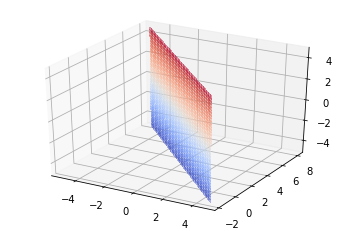

In [18]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
# R = np.sqrt(X**2 + Y**2)
Z = -3*X

# Plot the surface.
surf = ax.plot_surface(X, 3-X, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False,alpha=.4)

  2. $x^2 + y^2 +z^2 = 1$

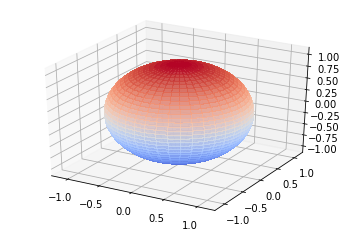

In [17]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x = np.linspace(0, 2*np.pi,80)
y = np.linspace(0, np.pi,40)
x, y = np.meshgrid(x, y)
X = np.sin(y)*np.cos(x)
Y = np.sin(y)*np.sin(x)
Z = np.cos(y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False,alpha=.8)
scaling = np.array([getattr(ax, 'get_{}lim'.format(dim))() for dim in 'xyz']); 
ax.auto_scale_xyz(*[[np.min(scaling), np.max(scaling)]]*3);